<ipython-input-9-6a5b20e65339>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(SNR_l, SPR_l, RSNR.T, cmap="plasma", vmin=RSNR_low, vmax=RSNR_high)
<ipython-input-9-6a5b20e65339>:63: UserWarning: No contour levels were found within the data range.
  CS = plt.contour(X, Y, RSNR.T,  levels = levels, colors = 'k')


<a list of 0 text.Text objects>

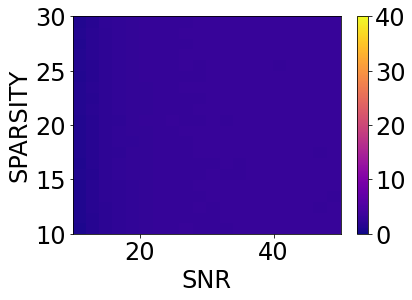

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
from a_algorithms import pes
from scipy.fft import dct
import scipy
import scipy.io as sio
from argparse import ArgumentParser
# Load the data 
import a_algorithms

# parser = ArgumentParser(description='Phase plots Generation')
# parser.add_argument('--algo', type=str, default='ISTA')
# args = parser.parse_args()
algo ='TF_ISTA'

RSNR = np.zeros([21,21]); NMSE = np.zeros([21,21]); PES = np.zeros([21,21]); 
SNR_l = range(10,51,2); SPR_l = range(10,31)

# Thresholds meant for MCP
for snr_idx, SNR in enumerate(SNR_l):
    for spr_idx, sparsity in enumerate(SPR_l):

        TF_D = sio.loadmat(f'phase_plots_vals_train/{algo}_sparsity_{sparsity}_SNR_{SNR}')
        RSNR[snr_idx, spr_idx] = TF_D['SNR']; PES[snr_idx, spr_idx] = TF_D['PES']; NMSE[snr_idx, spr_idx] = TF_D['NMSE']

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)

RSNR_low = 0; RSNR_high = 40
PES_low = 0.5; PES_high = 1
NMSE_low = -40; NMSE_high = 0


ISTA_D = sio.loadmat(f'phase_plot_sim_results_test/{algo}')
SNR_l = range(10,51,2); SPR_l = range(10,31)
RSNR = np.zeros([21,21]); NMSE = np.zeros([21,21]); PES = np.zeros([21,21]); 

RSNR = ISTA_D['RSNR']; PES = ISTA_D['PES']; NMSE = ISTA_D['NMSE']

import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)

plt.figure()
plt.pcolormesh(SNR_l, SPR_l, RSNR.T, cmap="plasma", vmin=RSNR_low, vmax=RSNR_high)
# plt.tick_params(left = False, right = False , labelleft = False ,
                # labelbottom = False, bottom = False)
plt.xlabel('SNR')
plt.ylabel('SPARSITY')
plt.colorbar()
X, Y = np.meshgrid(SNR_l, SPR_l)
# ---------------- Add the countours ----------------------
levels = np.array([15,20,25,30])
CS = plt.contour(X, Y, RSNR.T,  levels = levels, colors = 'k')
plt.clabel(CS, inline=True, fontsize=10, colors = 'k')

# plt.savefig(f'phase_plot_sim_results_train/{args.algo}_RSNR_train.pdf', bbox_inches='tight')

In [18]:
TF_D = sio.loadmat(f'phase_plots_vals_train/{algo}_sparsity_{sparsity}_SNR_{SNR}')
gam_best = TF_D['gam_snr'][0][0]; thr_best = TF_D['thr_snr'][0][0];


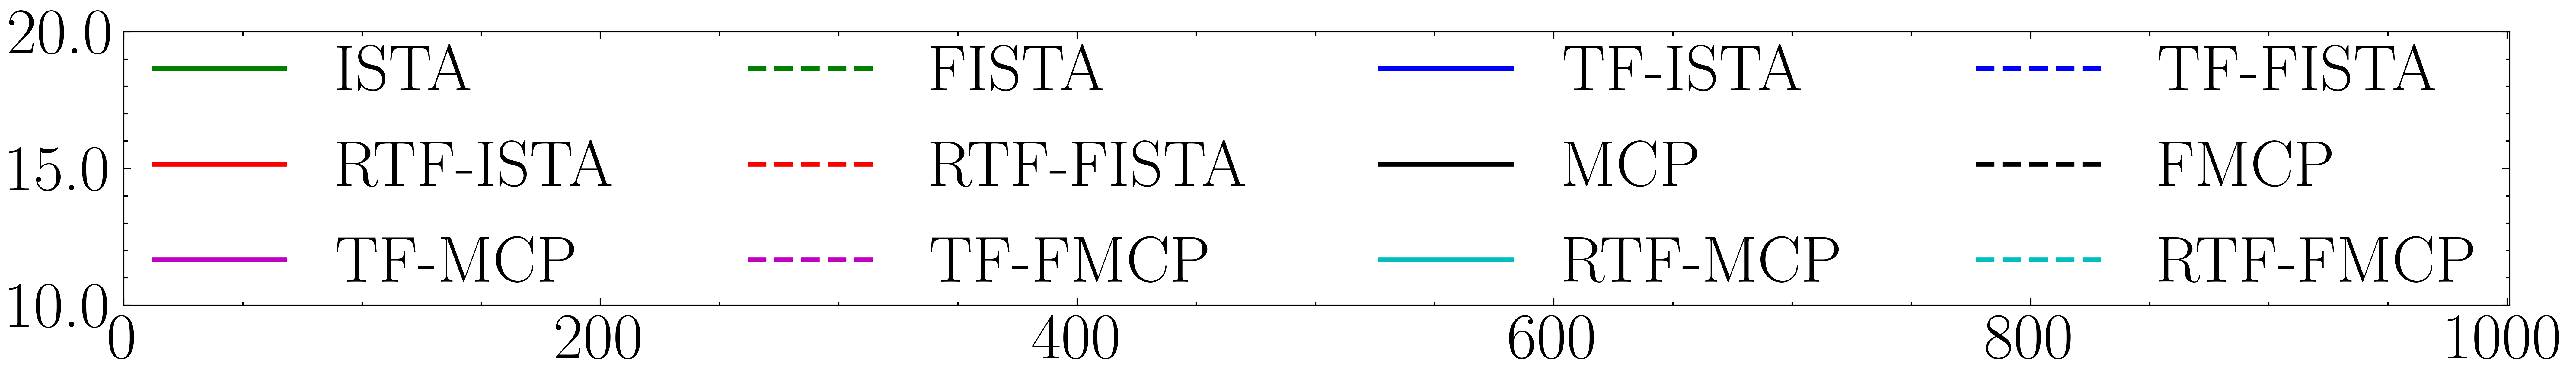

In [35]:
# Plot the Legend
import numpy as np
import scipy.linalg as LA
from a_algorithms import pes
from scipy.fft import dct
import scipy
from plotting_tools import plot_signal 
import scipy.io as sio
from plotting_tools import *
import scienceplots

plt.style.use(['science','ieee'])
plt.rcParams.update({"font.family": "sans","font.serif": ["cm"],"mathtext.fontset": "cm","font.size": 26}) 

ISTA_color = 'green'; TF_ISTA_color = 'blue'; RTF_ISTA_color = 'red'; 
MCP_color = 'k'; TF_MCP_color = 'm'; RTF_MCP_color = 'c'
width = 2

plt.figure(figsize=(17,2))
ax = plt.gca()

numIter = 1000
dummy_list = np.zeros([1000,])
legend_par = True

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'ISTA',legend_show= legend_par,
    line_width=width, plot_colour=ISTA_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'RTF-ISTA',legend_show= legend_par,
    line_width=width, plot_colour=RTF_ISTA_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'TF-MCP',legend_show= legend_par,
    line_width=width, plot_colour=TF_MCP_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'FISTA',legend_show= legend_par,
    line_width=width, plot_colour=ISTA_color, line_style='--')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'RTF-FISTA',legend_show= legend_par,
    line_width=width, plot_colour=RTF_ISTA_color, line_style='--')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'TF-FMCP',legend_show= legend_par,
    line_width=width, plot_colour=TF_MCP_color, line_style='--')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'TF-ISTA',legend_show= legend_par,
    line_width=width, plot_colour=TF_ISTA_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'MCP',legend_show= legend_par,
    line_width=width, plot_colour=MCP_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'RTF-MCP',legend_show= legend_par,
    line_width=width, plot_colour=RTF_MCP_color, line_style='-')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'TF-FISTA',legend_show= legend_par,
    line_width=width, plot_colour=TF_ISTA_color, line_style='--')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'FMCP',legend_show= legend_par,
    line_width=width, plot_colour=MCP_color, line_style='--')

plot_signal(range(1, 1+numIter), dummy_list, ax=ax,
    legend_label=r'RTF-FMCP',
    line_width=width, plot_colour=RTF_MCP_color, line_style='--',
    # xaxis_label=r'ITERATIONS', yaxis_label=r'MSE [DB]',
    n_col=4, legend_loc='center', legend_show= legend_par,
    xlimits=[0,1+numIter], ylimits=[10, 20],
    save = f'./MCP_SNR_vs_Iter/legend')

<ipython-input-75-9862f3154327>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(SNR_l, SPR_l, RSNR.T, cmap="plasma", vmin=RSNR_low, vmax=RSNR_high)


<a list of 5 text.Text objects>

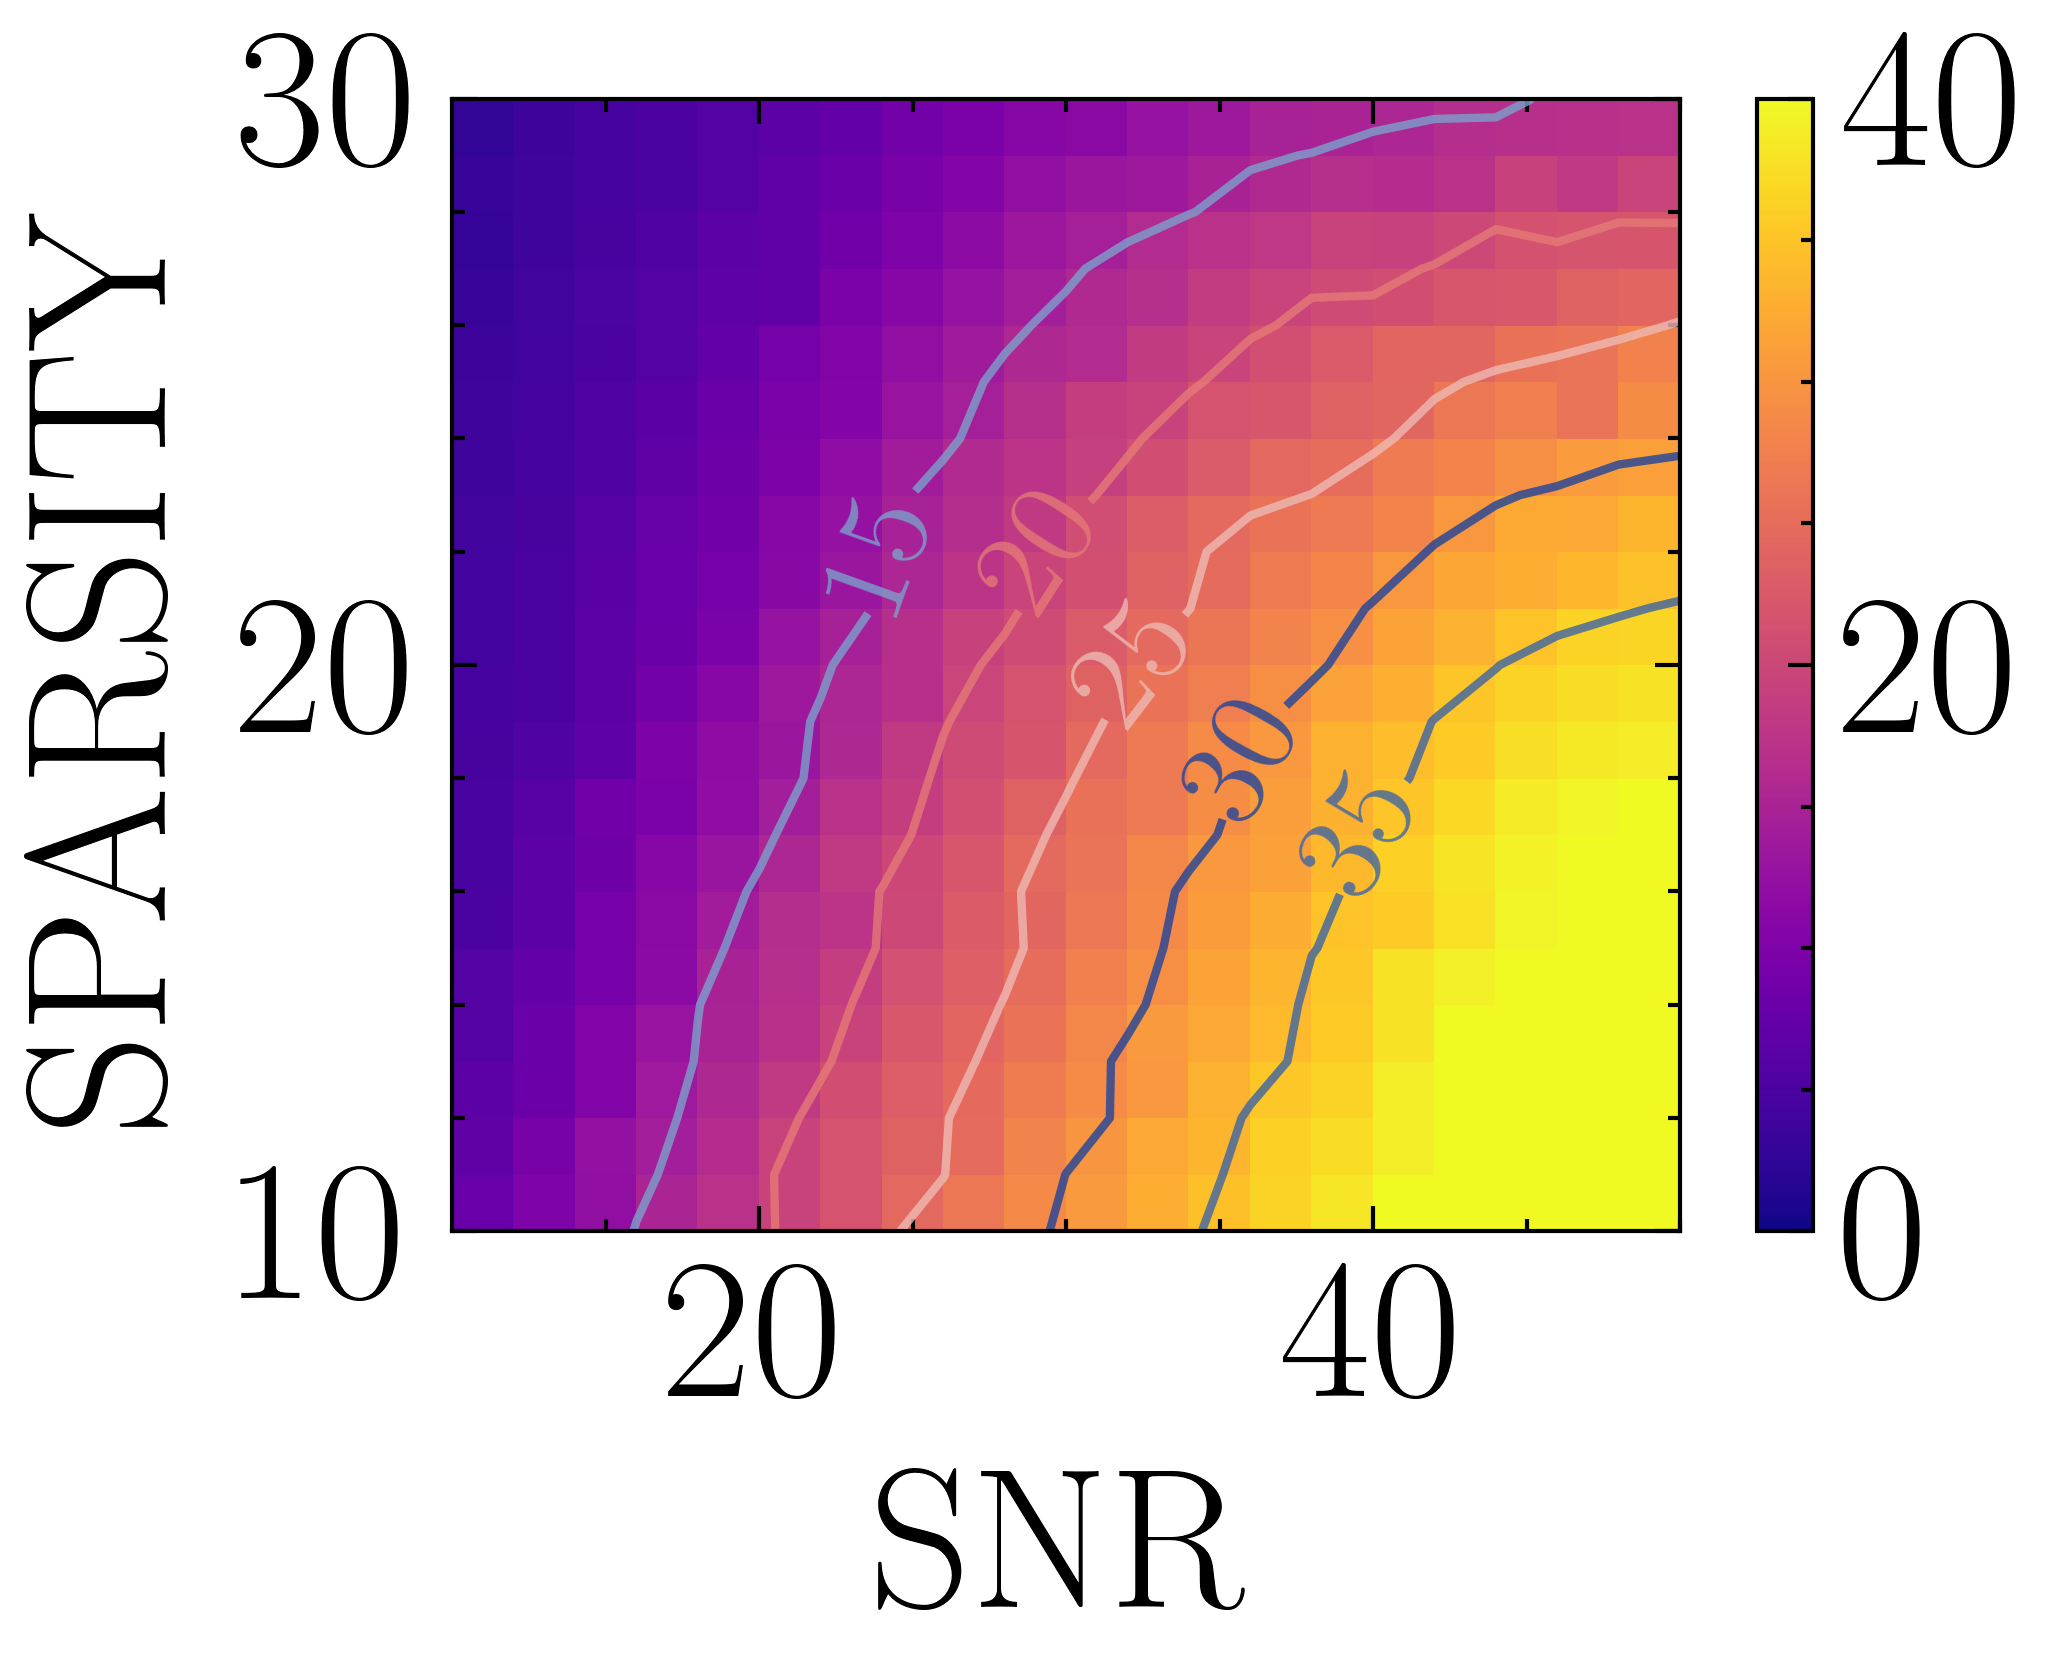

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
from a_algorithms import pes
from scipy.fft import dct
import scipy
import scipy.io as sio
from argparse import ArgumentParser
# Load the data 
import a_algorithms

# parser = ArgumentParser(description='Phase plots Generation')
# parser.add_argument('--algo', type=str, default='ISTA')
# args = parser.parse_args()

RSNR = np.zeros([21,21]); NMSE = np.zeros([21,21]); PES = np.zeros([21,21]); 
SNR_l = range(10,51,2); SPR_l = range(10,31)

X, Y = np.meshgrid(SNR_l, SPR_l)

algo = 'FMCP'

ISTA_D = sio.loadmat(f'phase_plot_sim_results_test/{algo}')
SNR_l = range(10,51,2); SPR_l = range(10,31)
RSNR = np.zeros([21,21]); NMSE = np.zeros([21,21]); PES = np.zeros([21,21]); 

RSNR = ISTA_D['RSNR']; PES = ISTA_D['PES']; NMSE = ISTA_D['NMSE']

import matplotlib
plt.style.use(['science','ieee'])
plt.rcParams.update({"font.family": "sans","font.serif": ["cm"],"mathtext.fontset": "cm","font.size": 26}) 


matplotlib.rc('font', **font)

RSNR_low = 0; RSNR_high = 40
PES_low = 0.5; PES_high = 1
NMSE_low = -40; NMSE_high = 0

plt.figure()
plt.pcolormesh(SNR_l, SPR_l, RSNR.T, cmap="plasma", vmin=RSNR_low, vmax=RSNR_high)
# plt.tick_params(left = False, right = False , labelleft = False ,
                # labelbottom = False, bottom = False)
plt.xlabel('SNR')
plt.ylabel('SPARSITY')
plt.colorbar()

# ---------------- Add the countours ----------------------
levels = np.array([15, 20, 25, 30, 35])#.astype(np.int32)
colors_ = ['#F05039', '#E57A77', '#EEBAB4', '#1F449C', '#3D65A5', '#7CA1CC', '#A8B6CC']
colors_2 = ['#7CA1CC', '#E57A77', '#EEBAB4', '#1F449C', '#3D65A5']
colors_3 = 'k'
CS = plt.contour(X, Y, RSNR.T,  levels = levels, colors = colors_2, alpha = 0.8)
plt.clabel(CS, inline=True, fontsize=15, fmt='%1.0f', colors = colors_2)

# --- Save the Figure ----
# plt.savefig(f'phase_plot_sim_results_train/{args.algo}_RSNR_train_countour_m50.pdf', bbox_inches='tight')

# CS = ax.contour(Z, levels, origin='lower', cmap='flag', extend='both',
#                 linewidths=2, extent=(-3, 3, -2, 2))

# # Thicken the zero contour.
# CS.collections[6].set_linewidth(4)

# ax.clabel(CS, levels[1::2],  # label every second level
#           inline=True, fmt='%1.1f', fontsize=14)

# # make a colorbar for the contour lines
# CB = fig.colorbar(CS, shrink=0.8)